In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
fname = "raw_2019.csv" 
df = pd.read_csv(fname, index_col=None, header=0, low_memory=False)
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")
df.sort_values(by='date', inplace=True)

In [3]:
def pie_plot(col, title):
    plt.figure()
    col.dropna().value_counts().plot(kind='pie')
    plt.axis('equal')
    plt.savefig(title +"_pie.pdf")

def rep_plot(col, title):
    plt.figure()
    col.dropna().value_counts().plot(kind='barh')
    plt.xlabel('Frequency')
    plt.savefig(title +"_rep.pdf")

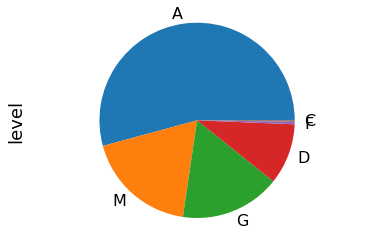

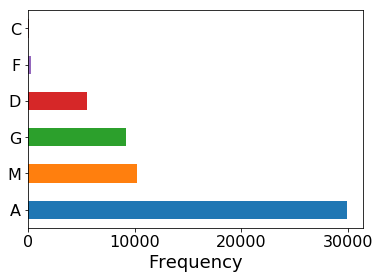

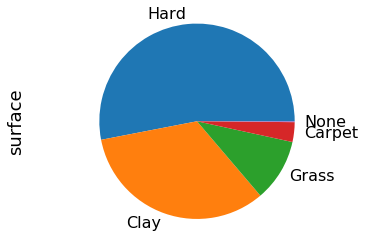

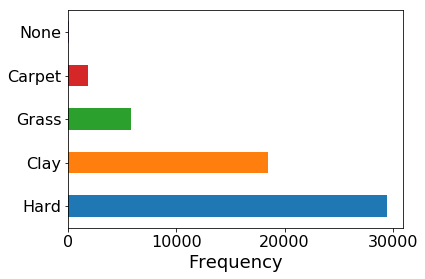

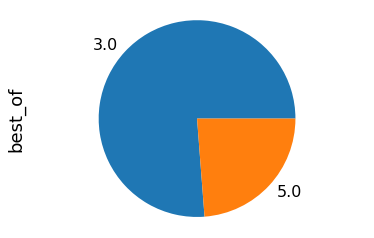

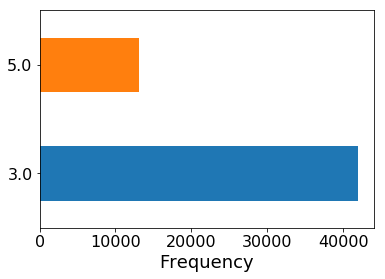

In [4]:
# Repartition by surface 
pie_plot(df.level, "LevelRepartion")
rep_plot(df.level, "LevelRepartion")
# Repartition by level 
pie_plot(df.surface, "SurfacesRepartion")
rep_plot(df.surface, "SurfacesRepartion")
# Repartition by number of sets 
pie_plot(df.best_of, "BestofRepartition")
rep_plot(df.best_of, "BestofRepartition")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

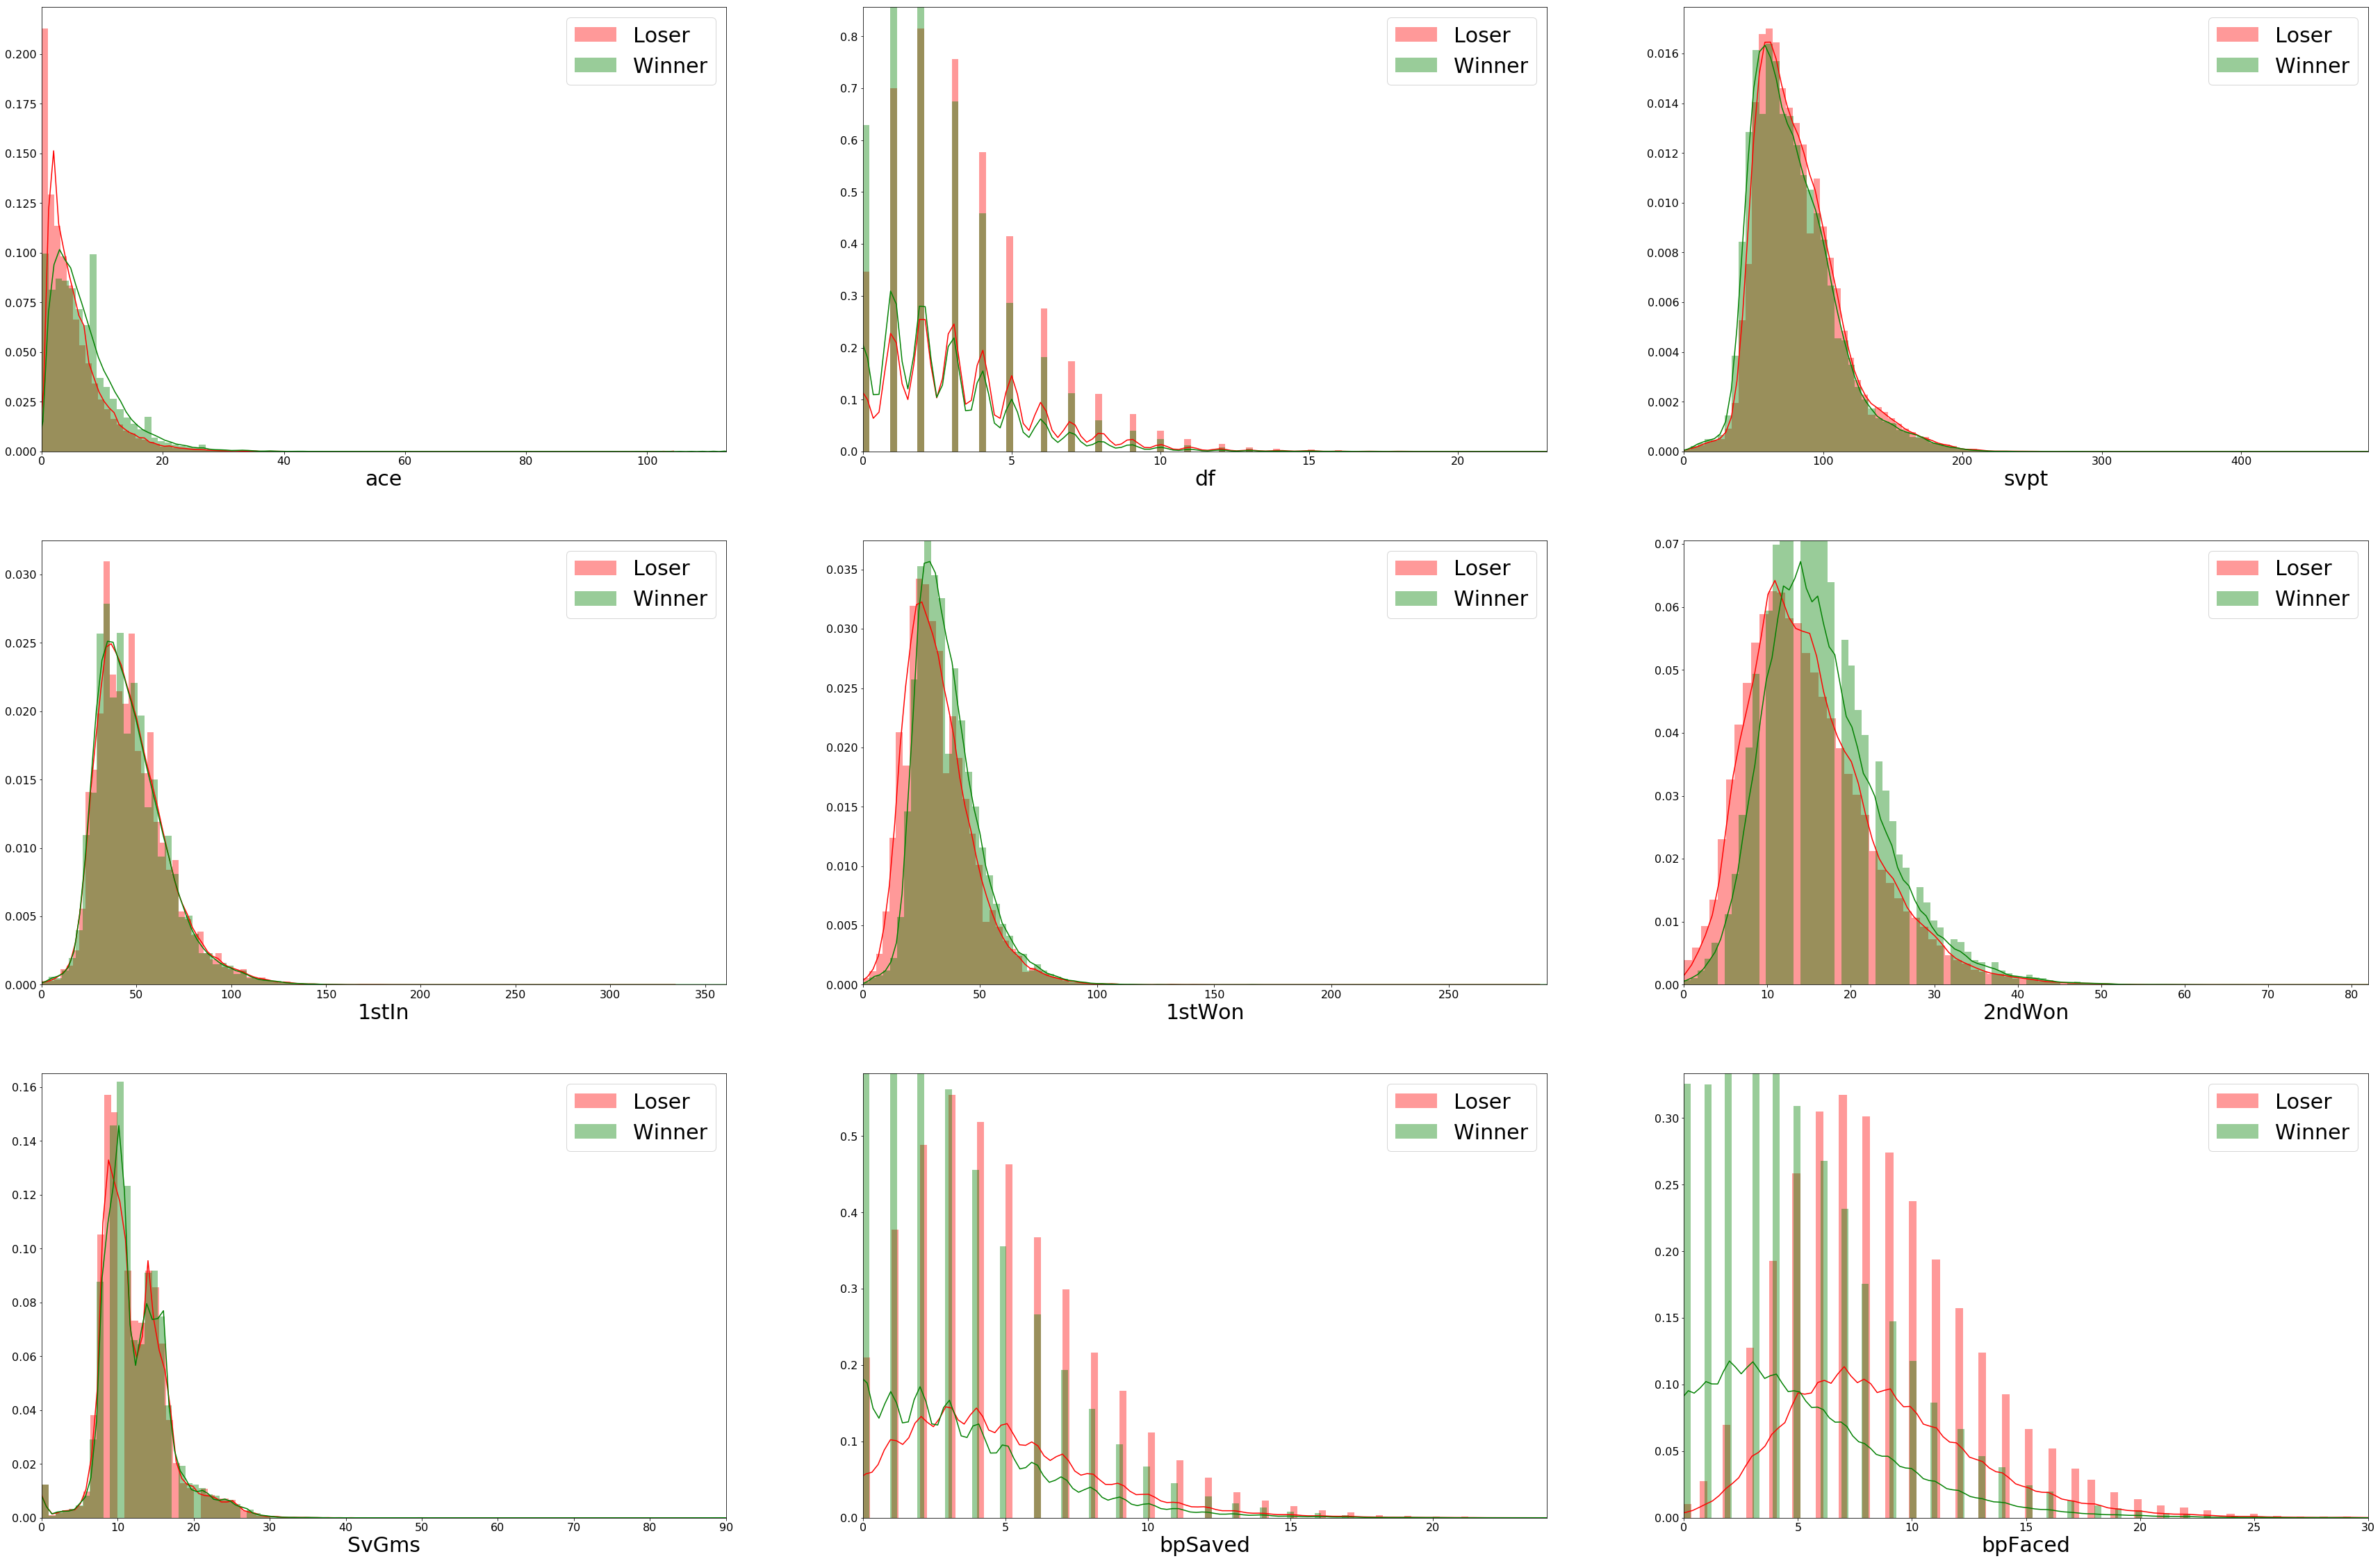

In [5]:
# Stats Distributions


cols = ['ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon',
        'SvGms', 'bpSaved', 'bpFaced']

    
f, axes = plt.subplots(nrows=3, ncols=3)
axes = axes.flatten()
f.set_size_inches(60, 40, forward=True)

for i, col in enumerate(cols):
    sns.distplot(df['l_' + col].dropna(), color='red', bins=100, ax=axes[i])
    sns.distplot(df['w_' + col].dropna(), color='green', bins=100, ax=axes[i])
    axes[i].set_xlim(0, df['w_' + col].dropna().max())
    axes[i].set_xlabel(col, fontsize=30)
    axes[i].legend(['Loser', 'Winner'], fontsize=30)

f.savefig('distributions.pdf')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


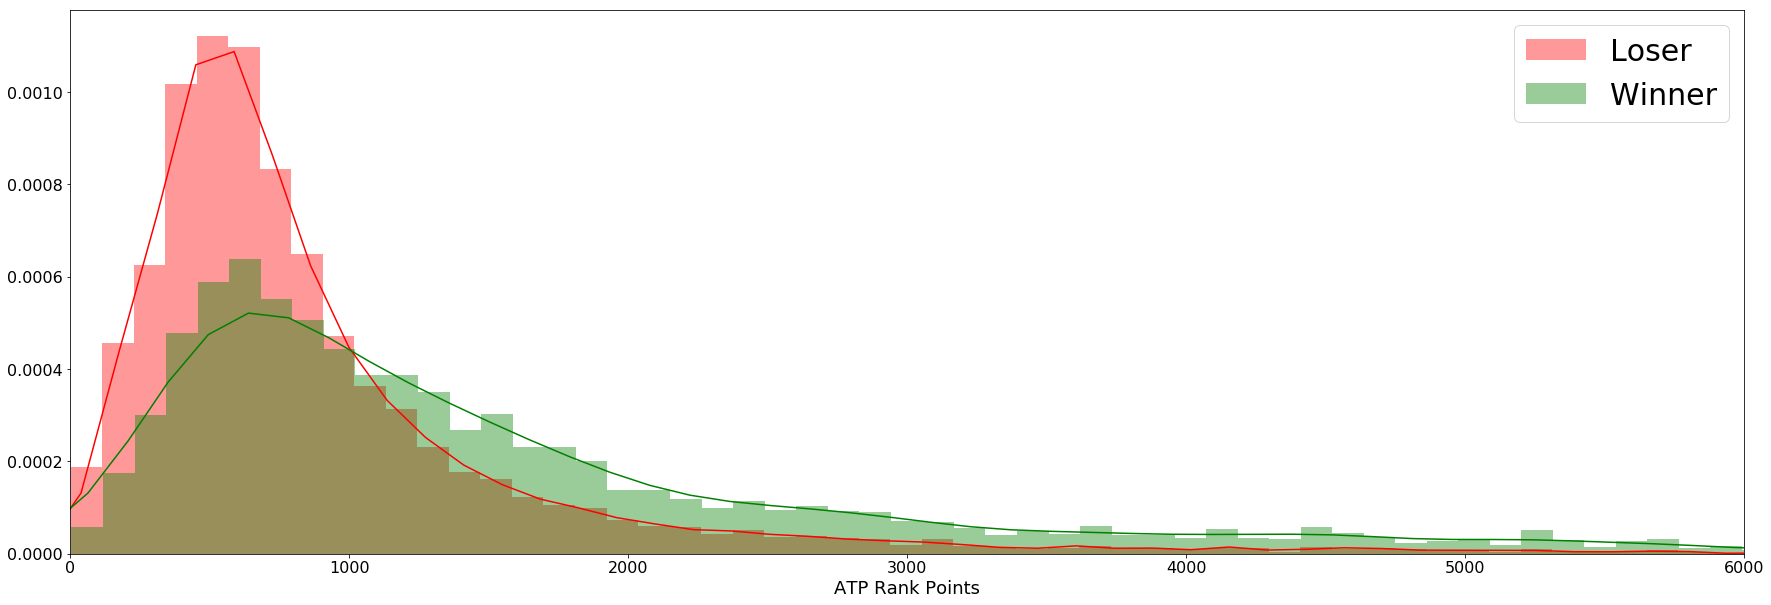

In [6]:
# GS
plt.figure(figsize=(30, 10))
sns.distplot(df[df.level=='G'].loser_rank_points.dropna(), color='red', bins=150)
sns.distplot(df[df.level=='G'].winner_rank_points.dropna(), color='green', bins=150)
plt.xlim(0, 6000)
plt.xlabel("ATP Rank Points")
plt.legend(['Loser', 'Winner'], fontsize=30)
plt.savefig("gs_ranks.pdf")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


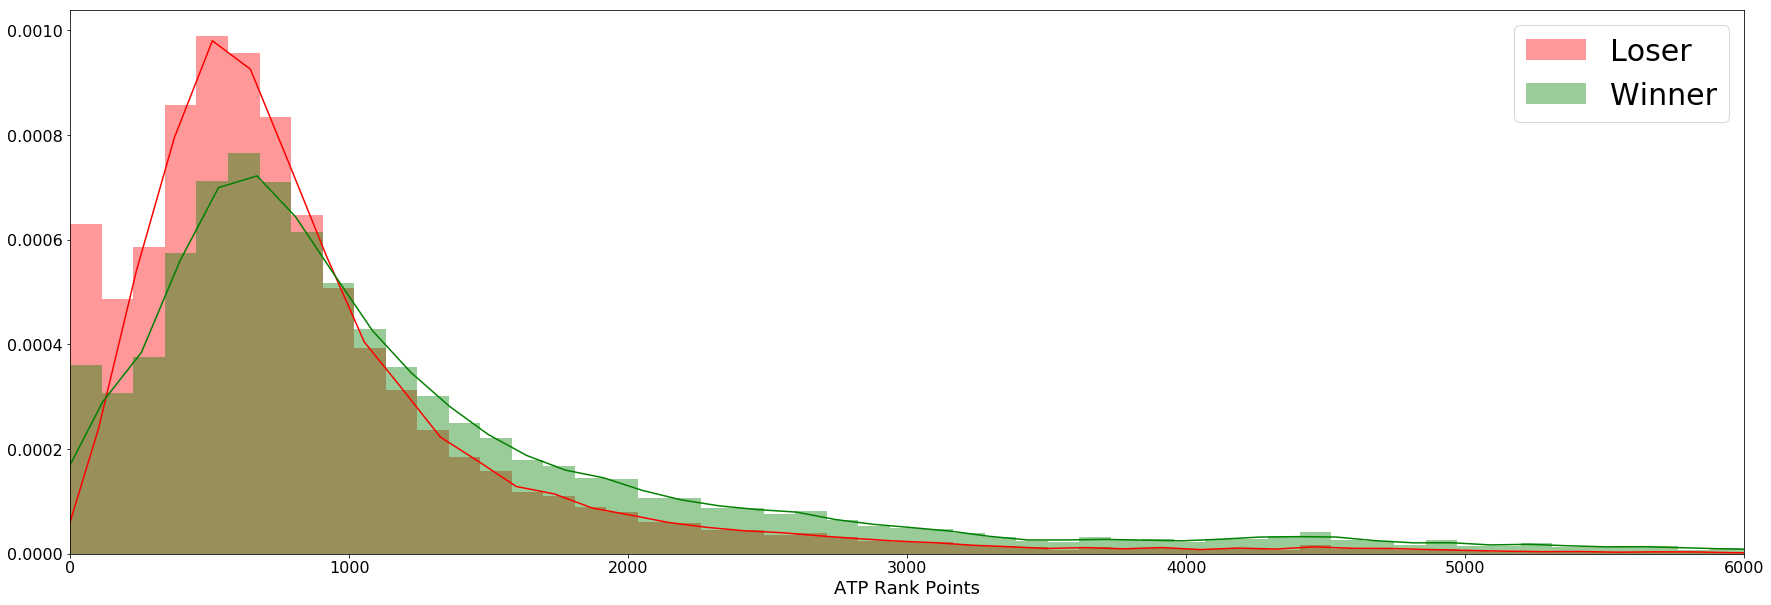

In [7]:
# All tournaments
plt.figure(figsize=(30, 10))
sns.distplot(df.loser_rank_points.dropna(), color='red', bins=150)
sns.distplot(df.winner_rank_points.dropna(), color='green', bins=150)
plt.xlabel("ATP Rank Points")
plt.xlim(0, 6000)
plt.legend(['Loser', 'Winner'], fontsize=30)
plt.savefig("all_ranks.pdf")